# Euro exchange rates from 1999 until today 
### Between Euro and American dollar as well as Euro and Brazilian Real
This project had, originally, the objective of analyzing the exchange rate between the Euro and the American dollar. But as a Brazilian woman, I have a personal interest to see the exchange rates between Euro and Brazilian real.  
Because of this reason, we are going to dive into this three currencies and make an interesting comparison.

The data was taken from a data set put together by Daria Chemkaeva available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020). The dataset has been uploaded to my github and it will be used from there here.

## 1 Setting up the environment
Before starting any analisis, we are going to import all libraries we are going to need, as well as change some default options.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# showing graphs inline
%matplotlib inline

In [2]:
# showing all columns in the dataframes
pd.set_option('display.max_columns', None)

# centering the image outputs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin: auto;
}
.prompt
    display:none;
}
}
</style>
""")

We will also read our csv data into pandas dataframes, before moving to the exploration step.

In [3]:
location = 'https://raw.githubusercontent.com/nathpignaton/guided_projects/main/euro-exchange-rates/euro-daily-hist_1999_2020.csv'

exchange_rates = pd.read_csv(location)
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,NaN,0.86708,NaN,9.3685,7.5335,358.18,17246.34,3.9312,88.9405,150.9,131.69,1352.78,NaN,NaN,NaN,24.4195,4.9711,10.0558,1.6715,57.845,4.5868,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,NaN,0.86274,NaN,9.3267,7.5315,359.65,17313.31,3.9212,88.6925,150.8,131.20,1350.98,NaN,NaN,NaN,24.2675,4.9431,9.9848,1.6683,57.658,4.5778,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,NaN,0.86770,NaN,9.3374,7.5408,360.31,17395.47,3.9097,88.8140,148.8,131.26,1353.56,NaN,NaN,NaN,24.4040,4.9563,10.0123,1.6887,57.787,4.5584,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,NaN,0.86838,NaN,9.3554,7.5433,359.94,17374.55,3.9053,88.9960,151.0,131.90,1351.95,NaN,NaN,NaN,24.4071,4.9432,10.0160,1.6786,58.081,4.5518,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,NaN,0.86863,NaN,9.3816,7.5465,359.86,17424.24,3.9199,89.4795,149.6,131.62,1346.24,NaN,NaN,NaN,24.2345,4.9482,9.9533,1.6738,58.286,4.5635,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875


## 2 Getting to know our data
To start, let's explore our data a little bit.

In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

We can see that lot's of columns store the exchange information in object types, instead of float. Alto the `US dollar` has no null values, so we don't need to look it out, but the `Brazilian real`, on the other hand, has some values missing. With that in mind, let's isolate the currencies we are going to use and check out the missing values.

## 3 Cleaning the data
Let's start isolating the information we need but, before it, let's check out our `Period\Unit` column, that has the wrong type. We are going to change it  to, after it, isolate the columns and resolve the missing values.

In [5]:
# changing the type of the date column
exchange_rates['Period\\Unit:'] = pd.to_datetime(exchange_rates['Period\\Unit:'])

# sorting the dates
exchange_rates.sort_values('Period\\Unit:', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


Done that, let's create a new dataframe with the currencies we need.

In [6]:
# creating a new dataframe with only the columns we need
euro_ex = pd.DataFrame()
euro_ex['Time'] = exchange_rates['Period\\Unit:']
euro_ex['US_dollar'] = exchange_rates['[US dollar ]']
euro_ex['BR_real'] = exchange_rates['[Brazilian real ]']
euro_ex.head()

,Time,US_dollar,BR_real
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN


As we can see above, Brazilian real doesn't have as much data as we wanted, let's take a look into the missing values with a plot.

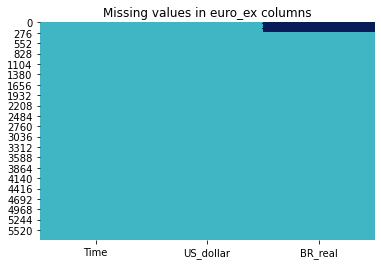

In [7]:
# heatmap with missing values
plt.title('Missing values in euro_ex columns')
ax = sns.heatmap(euro_ex.isnull(), cbar=False, center=0, cmap='YlGnBu')

The map shows that there are some missing values only in `BR_real` column, I suspect that Brazilian Real's data begin in a later year, so let's, first, create a year column, aggregate the data to it and see the missing entries per year.

In [8]:
# creating the dataframe with BR real aggregated by year
br_real = pd.DataFrame()
br_real = euro_ex[['Time', 'BR_real']].copy()
br_real['Year'] = br_real['Time'].dt.year
year = br_real.groupby(by='Year').sum()
year.drop('Time', axis=1, inplace=True)
year

,BR_real
Year,
1999,0
2000,NaN
2001,-1.82761.85451.83061.85891.85481.83121.82971.8...
2002,-2.08622.07292.06662.09532.08342.11782.12482.1...
2003,-3.67703.61123.51453.51393.44053.49153.45233.4...
2004,-3.64293.60453.63043.64523.61513.62703.62873.5...
2005,3.60263.59233.60373.58673.58433.53833.56013.57...
2006,2.76572.79242.79632.74412.77352.73352.73052.73...
2007,-2.83602.82592.80992.81212.81392.79202.80302.7...


As we can see above, the data starts in 2001, so we are going to drop all rows in 1999 and 2000. For `US dollar` and `BR real` since we are doing a comparison. We can also see that the numbers didn't sum properly, showing that they aren't properly stored in the right number types, we are going to treat it later.

In [25]:
# substituting the values with only the non 1999 and 2000 years
euro_ex = euro_ex[(euro_ex['Time'].dt.year!=1999) & (euro_ex['Time'].dt.year!=2000)].copy()
euro_ex.reset_index(drop=True, inplace=True)
euro_ex

,Time,US_dollar,BR_real
0,2001-01-01,-,-
1,2001-01-02,0.9423,1.8276
2,2001-01-03,0.9530,1.8545
3,2001-01-04,0.9458,1.8306
4,2001-01-05,0.9545,1.8589
...,...,...,...
5256,2021-04-30,1.2082,6.4597
5257,2021-05-03,1.2044,6.5507
5258,2021-05-04,1.2021,6.5785
5259,2021-05-05,1.2005,6.5174


Done that, let's put the numbers into the right types as well checking out the unique values per column to see if they have entries without any information, the grouped dataframe showed us some '-' characters in `BR_real`, so maybe there are the same chars in US dollar data as well.

In [28]:
euro_ex['US_dollar'].value_counts()

-         56
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.0627     1
1.3743     1
1.2716     1
1.4787     1
1.4238     1
Name: US_dollar, Length: 3218, dtype: int64

In [29]:
euro_ex['BR_real'].value_counts()

-         56
2.7570     4
3.2395     4
3.3277     4
3.0909     4
          ..
2.3332     1
2.2377     1
2.6405     1
2.4022     1
4.2464     1
Name: BR_real, Length: 4695, dtype: int64

Above we can see that 56 entries have this char, so we are going to drop them all.

In [36]:
# creating a new df with the '-' entries
euro_ex = euro_ex[(euro_ex['US_dollar']!='-') & (euro_ex['BR_real']!='-')]
euro_ex.reset_index(drop=True, inplace=True)

# transforming to numeric
euro_ex['US_dollar'] = pd.to_numeric(euro_ex['US_dollar'])
euro_ex['BR_real'] = pd.to_numeric(euro_ex['BR_real']) 
euro_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5205 non-null   datetime64[ns]
 1   US_dollar  5205 non-null   float64       
 2   BR_real    5205 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 122.1 KB


Now that our data is cleaned, in the right data type and without values missing, let's start to properly explore it.

## 4 Exploring our data
To do so, let's start plot a line graph to see how the currencies changed over the last years.

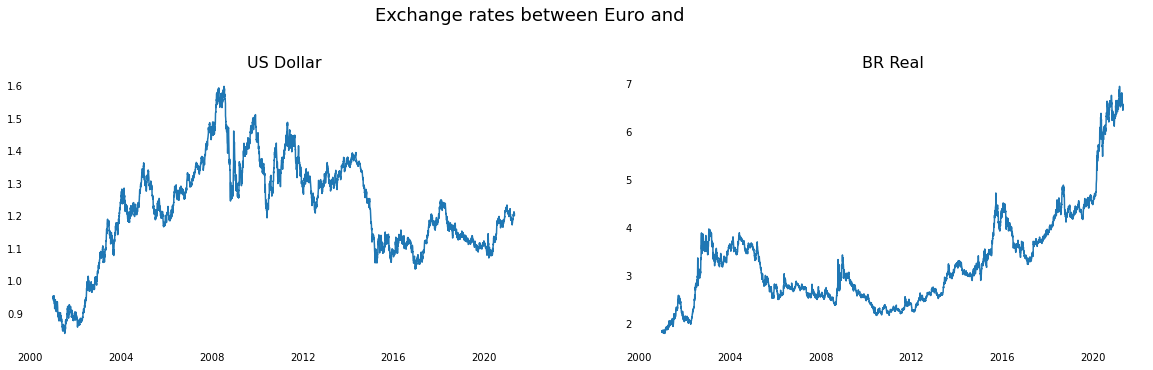

In [118]:
# grid to plot both graphs separately
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

def lineplot(ax, x_data, y_data, title):
    ax.plot(x_data, y_data)
    ax.set_title(title, size=16)
    ax.tick_params(bottom=0, left=0)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    return ax

ax1 = lineplot(ax1, euro_ex['Time'], euro_ex['US_dollar'], 'US Dollar')
ax2 = lineplot(ax2, euro_ex['Time'], euro_ex['BR_real'], 'BR Real')

ax1.text(x=16500, y=1.8, s='Exchange rates between Euro and', size=18)

plt.show()

The graphs above were plotted using the data for every single day, bellow we are going to calculate the **rolling mean** for a month (30 days) to see the differences.

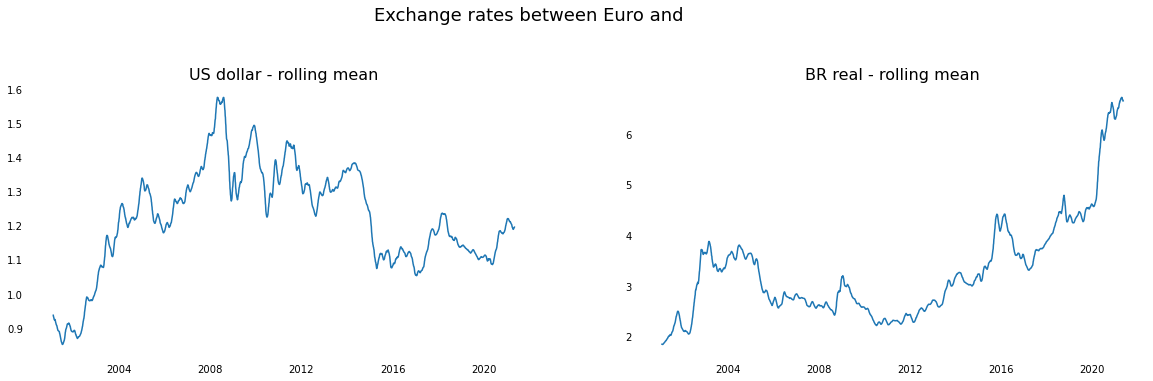

In [120]:
# creating the rolling mean (rm) columns
euro_ex['rm_dollar'] = euro_ex['US_dollar'].rolling(30).mean()
euro_ex['rm_real'] = euro_ex['BR_real'].rolling(30).mean()

# plotting the new graphs
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1 = lineplot(ax1, euro_ex['Time'], euro_ex['rm_dollar'], 'US dollar - rolling mean')
ax2 = lineplot(ax2, euro_ex['Time'], euro_ex['rm_real'], 'BR real - rolling mean')

ax1.text(x=16500, y=1.8, s='Exchange rates between Euro and', size=18)

plt.show()

After checking out the information, let's investigate the reasons between the currency changes and create a storytelling data visualization in the next chapters. We are going to compare the realities side by side, showing the aspects that made the currencies change in the different periods of time. 

## 5 Conclusions - a final product
Bellow, we are going to create some static graphs to tell the story we want to know, creating a "Report" as final product, after it we are going to try a different approach: a dashboard using graphs made with Bokeh built in Streamlit and hosted by ***insert the name here***. 